In [124]:
!pip install xlrd==1.2.0
!pip install openpyxl
#!pip install --upgrade tensorflow
#!pip install --upgrade tensorflow-gpu
!pip install xlrd==1.2.0
!pip install openpyxl
!pip install bltk
!pip install nltk
!pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer
!pip install bnlp_toolkit
import bltk
import numpy as np
import pandas as pd
import re
import _pickle as cPickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from nltk.corpus import stopwords
import nltk
from pandas import read_excel
from nltk.stem import WordNetLemmatizer
import string
from textblob import Word, TextBlob
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/banglakit/lemmatizer.git to /tmp/pip-install-3cau15ct/banglakit-lemmatizer_d7c35c672b404277adf50c526fc4c72a
  Running command git clone -q https://github.com/banglakit/lemmatizer.git /tmp/pip-install-3cau15ct/banglakit-lemmatizer_d7c35c672b404277adf50c526fc4c72a
Looking in inde

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
df_train= pd.read_csv('/content/drive/MyDrive/ start/ott text reviews.csv' )
df_train

,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
5034,মুভিটা সত্যি অনেক রহস্যময়.. দেখে অনেক মজা পাইছি।,1
5035,দারুণভাবে উপভোগ করলাম। খুব রোমহষর্ক ও চিত্তাক...,1
5036,"কি সুন্দর গ্রাফিক্স,বাঘ হাঁটছে,কিন্তু পাতা নড়...",2
5037,ভালো লাগছে। বর্তমান যুগের প্রতিচ্ছবি।,1


In [127]:
df_train.drop_duplicates(inplace=True)

In [128]:
df_train.shape

(4769, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



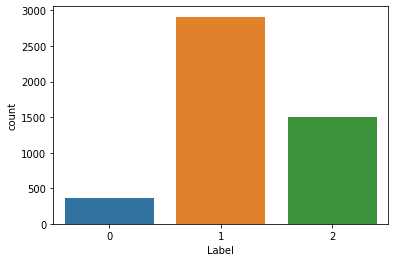

In [129]:
sns.countplot(df_train['Label']);

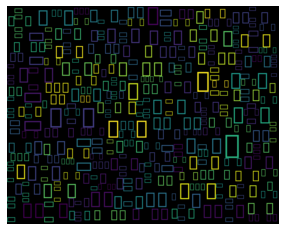

In [130]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in df_train['Text']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

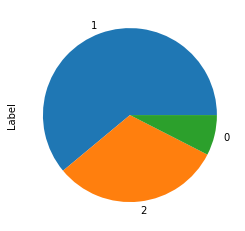

In [131]:

df_train['Label'].value_counts().plot(kind='pie')
plt.show()

Preprocessing/Cleaning

In [132]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [133]:
df_train['Text'] = df_train.Text.apply(lambda x: preprocessing(str(x)))

In [134]:
df_train

,Text,Label
0,পুরাই অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফিও জোস,1
4,এট লিস্ট অনন্ত জলীল এর কোটি টাকার মুভির ট্রেই...,1
...,...,...
5033,বাইষচঙদ মার্কা স্ক্রিপ্ট,2
5034,মুভিটা সত্যি অনেক রহস্যময় দেখে অনেক মজা পাইছি,1
5035,দারুণভাবে উপভোগ করলাম খুব রোমহষর্ক ও চিত্তাকর্ষক,1
5037,ভালো লাগছে বর্তমান যুগের প্রতিচ্ছবি,1


In [135]:
from bnlp import BasicTokenizer
btokenizer = BasicTokenizer()
def clean_text(Text):
    
    tokens = btokenizer.tokenize(Text)

Stopwords Removal

In [136]:
data1 =pd.read_excel('/content/drive/MyDrive/ start/stopwords_bangla.xlsx')
stop = data1['words'].tolist()

In [137]:
data1

,Unnamed: 0,words
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ
...,...,...
727,727,হয়েই
728,728,হয়েছিল
729,729,হয়েছে
730,730,হয়েছেন


In [138]:
def stopwordRemoval(text):    
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]
    
    out=' '.join(stm)
    
    return str(out)

In [139]:
df_train['Text'] = df_train.Text.apply(lambda x: stopwordRemoval(str(x)))

In [140]:
df_train

,Text,Label
0,পুরাই অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওনার কান্না আসছে,1
2,পুরাই আগুন দিনের অপেক্ষায় আছি দেখার,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফিও জোস,1
4,এট লিস্ট অনন্ত জলীল টাকার মুভির ট্রেইলার হাজার...,1
...,...,...
5033,বাইষচঙদ মার্কা স্ক্রিপ্ট,2
5034,মুভিটা সত্যি রহস্যময় মজা পাইছি,1
5035,দারুণভাবে উপভোগ করলাম রোমহষর্ক চিত্তাকর্ষক,1
5037,ভালো লাগছে যুগের প্রতিচ্ছবি,1


Stemming

In [141]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
df_train['Text']=df_train['Text'].apply(stem_text)

Streaming output truncated to the last 5000 lines.
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rul

In [143]:
df_train

,Text,Label
0,পুরা অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওন কান্না আস,1
2,পুরা আগুন দিন অপেক্ষায় আছি দেখ,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফি জোস,1
4,এট লিস্ট অনন্ত জলীল টাকা মুভির ট্রেইল হাজারগুন...,1
...,...,...
5033,বাইষচঙদ মার্কা স্ক্রিপ্ট,2
5034,মুভি সত্যি রহস্যময় মজা পাই,1
5035,দারুণভাবে উপভোগ কর রোমহষর্ক চিত্তাকর্ষক,1
5037,ভালো লাগ যুগ প্রতিচ্ছবি,1


In [144]:
#df_train["Text"].apply(lambda x: TextBlob(x).words).head()
#df_train['Text'] = df_train.Text.apply(lambda x: TextBlob(str(x)))

In [145]:
#df_train

lemmatizer

In [146]:
#importing lemmatizer
from banglakit import lemmatizer as lem
from banglakit.lemmatizer import BengaliLemmatizer

## lemmatizer function

def lemm_text (x):
  lemmatizer = BengaliLemmatizer()

  words=x.split(' ')
  lem = lemmatizer.lemm(words)
  words=(' ').join(lem)
  return words


In [147]:
df_train

,Text,Label
0,পুরা অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওন কান্না আস,1
2,পুরা আগুন দিন অপেক্ষায় আছি দেখ,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফি জোস,1
4,এট লিস্ট অনন্ত জলীল টাকা মুভির ট্রেইল হাজারগুন...,1
...,...,...
5033,বাইষচঙদ মার্কা স্ক্রিপ্ট,2
5034,মুভি সত্যি রহস্যময় মজা পাই,1
5035,দারুণভাবে উপভোগ কর রোমহষর্ক চিত্তাকর্ষক,1
5037,ভালো লাগ যুগ প্রতিচ্ছবি,1


Category Wise Data Distribution

In [148]:
print("IN TRAIN SET...")
temp1 = df_train.groupby('Label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp1.style.background_gradient(cmap='Purples')

IN TRAIN SET...


,Label,Text
1,1,2911
2,2,1500
0,0,358


Count of Texts in Each Category

In [149]:
from plotly import graph_objs as go
print("On Train Set....")
fig = go.Figure(go.Funnelarea(
    text =temp1.Label,
    values = temp1.Text,
    title = {"position": "top center", "text": "Funnel-Chart of Category Distribution on Train Set"}
    ))
fig.show()

On Train Set....


In [150]:
## x= df.Customer_reviewText
# y= df.Class


In [151]:
#Dataset Summary

def data_summary(df_train):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip() for t in list(df_train.Text) for word in t.strip().split()]
    class_label= [k for k,v in df_train.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip() for t in list(df_train[df_train.Label==label].Text) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
                
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        
        # Documents per class
        documents.append(len(list(df_train[df_train.Label==label].Text)))
        
        # Total Word per class
        words.append(len(word_list))
        
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(df_train[df_train.Label==label].Text))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
                
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label


documents,words,u_words,class_names = data_summary(df_train)   


Class Name :  1
Number of Documents:2911
Number of Words:19078
Number of Unique Words:4691
Most Frequent Words:

ভালো	546
গান	518
অসাধারণ	434
সুন্দর	307
এক	272
অভিনয়	260
না	256
সিরিজ	205
মুভি	153
দেখ	147

Class Name :  2
Number of Documents:1500
Number of Words:11609
Number of Unique Words:4376
Most Frequent Words:

না	337
ভালো	172
এক	124
অভিনয়	89
এসব	83
সমাজ	83
সিরিজ	75
সিনেমা	69
মুভি	61
নাটক	61

Class Name :  0
Number of Documents:358
Number of Words:2067
Number of Unique Words:1143
Most Frequent Words:

না	51
মুভি	24
ভালো	23
ভাই	21
এক	19
চাই	16
নাটক	13
থাকলে	12
যায়	11
দেখ	11
Total Number of Unique Words:8036


In [152]:
my_str = ' '

try:
    result = float(my_str)
except ValueError:
    result = 0


print(result)  # 👉️ 0


0


In [153]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [154]:
oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

ValueError: ignored

**Train-Test Spliting**

In [ ]:
#x= df_train.Text.values[:4769]
#y= df_train.Label.values[:4769]
from sklearn.model_selection import train_test_split
X = df_train.Text
y = df_train.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

**Applying Logestic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred1,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred1))

**Applying DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


decisiontreeclassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DecisionTreeClassifier()),
              ])
decisiontreeclassifier.fit(X_train, y_train)

y_pred = decisiontreeclassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforestclassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])
randomforestclassifier.fit(X_train, y_train)

y_pred = randomforestclassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying MultinomialNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB


naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naivebayes.fit(X_train, y_train)

y_pred = naivebayes.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', KNeighborsClassifier()),
              ])
KNeighborsClassifier.fit(X_train, y_train)

y_pred = KNeighborsClassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying SVC**

In [ ]:
from sklearn.svm import SVC

SVC = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SVC()),
              ])
SVC.fit(X_train, y_train)

y_pred = SVC.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying SGDClassifier**

In [ ]:
from sklearn.linear_model import SGDClassifier

SGDClassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier()),
              ])
SGDClassifier.fit(X_train, y_train)

y_pred = SGDClassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

xgboost = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', XGBClassifier()),
              ])
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**split and build model another way..**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer()
 
vectorizer.fit(x)
 
# Printing the identified Unique words along with their indices
# print("Vocabulary: ", vectorizer.vocabulary_)
 
# Encode the Document
vector = vectorizer.transform(x)
 
# Summarizing the Encoded Texts
# print("Encoded Document is:")
print(vector.toarray())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.2, shuffle=True, random_state=100)

In [ ]:
# X_train_counts.toarray()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model =SVC()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model =SGDClassifier()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)